In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid') # just optional!
%matplotlib inline

In [2]:
train = pd.read_csv('ML1.csv')

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

In [ ]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='complaint_type', data=train)

In [3]:
complaint_type = pd.get_dummies(train['complaint_type'], drop_first = True)

In [4]:
complaint_type.head()

,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,HEAT/HOT WATER,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,UNSANITARY CONDITION,WATER LEAK
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train = pd.concat([train, complaint_type],axis=1)

In [6]:
train.head()

,complaint_type,incident_address,incident_zip,NumFloors,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,HEAT/HOT WATER,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,UNSANITARY CONDITION,WATER LEAK
0,SAFETY,488 EAST 163 STREET,10451,5.0,0,0,0,0,0,0,0,0,0,1,0,0
1,SAFETY,488 EAST 163 STREET,10451,4.0,0,0,0,0,0,0,0,0,0,1,0,0
2,SAFETY,488 EAST 163 STREET,10451,6.0,0,0,0,0,0,0,0,0,0,1,0,0
3,SAFETY,488 EAST 163 STREET,10451,8.0,0,0,0,0,0,0,0,0,0,1,0,0
4,SAFETY,488 EAST 163 STREET,10451,1.0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
train = train.drop(['complaint_type','incident_address'], axis=1)

In [8]:
train.head()

,incident_zip,NumFloors,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,HEAT/HOT WATER,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,UNSANITARY CONDITION,WATER LEAK
0,10451,5.0,0,0,0,0,0,0,0,0,0,1,0,0
1,10451,4.0,0,0,0,0,0,0,0,0,0,1,0,0
2,10451,6.0,0,0,0,0,0,0,0,0,0,1,0,0
3,10451,8.0,0,0,0,0,0,0,0,0,0,1,0,0
4,10451,1.0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
train['HEAT/HOT WATER'].value_counts()

0    69455
1    30280
Name: HEAT/HOT WATER, dtype: int64

In [10]:
#train['HEAT/HOT WATER'].hist(bins=50);

In [11]:
#train.to_csv('mlohe.csv', index=False)

In [12]:
X = train.drop('HEAT/HOT WATER',axis=1)
y = train['HEAT/HOT WATER'] #Target variable

In [13]:
#X = train[['incident_zip','NumFloors']]

In [14]:
X.describe()

,incident_zip,NumFloors,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,UNSANITARY CONDITION,WATER LEAK
count,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000,99735.000000
mean,10455.386845,7.011880,0.075390,0.050845,0.002196,0.054133,0.057452,0.004131,0.097629,0.099383,0.019592,0.120800,0.079741
std,3.988992,5.482054,0.264021,0.219682,0.046808,0.226282,0.232706,0.064140,0.296813,0.299178,0.138594,0.325896,0.270894
min,10451.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10452.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10456.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10457.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10474.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(79788, 13)

In [19]:
X_test.shape

(19947, 13)

In [20]:
y_train.shape

(79788,)

In [21]:
y_test.shape

(19947,)

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Decision Tree

In [23]:
clf = DecisionTreeClassifier(random_state=42)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [32]:
feature = pd.DataFrame(clf.feature_importances_,index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
feature

,Importance
ELECTRIC,0.172696
FLOORING/STAIRS,0.143097
DOOR/WINDOW,0.120343
GENERAL,0.118821
WATER LEAK,0.098365
PAINT/PLASTER,0.093070
SAFETY,0.080707
PLUMBING,0.073858
UNSANITARY CONDITION,0.070462
OUTSIDE BUILDING,0.017777


In [31]:
res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9654
Accuracy SD: 		 0.0017


In [32]:
# doing predictions 
predictionstree = clf.predict(X_test)

In [33]:
print(classification_report(y_test,predictionstree))
print(confusion_matrix(y_test,predictionstree))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13922
           1       0.89      1.00      0.94      6025

   micro avg       0.96      0.96      0.96     19947
   macro avg       0.95      0.97      0.96     19947
weighted avg       0.97      0.96      0.96     19947

[[13179   743]
 [    0  6025]]


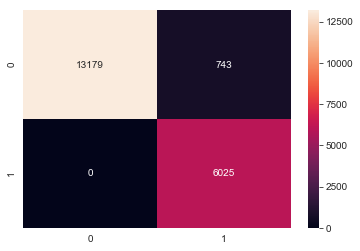

In [34]:
cm = confusion_matrix(y_test,predictionstree)
sns.heatmap(cm, annot=True, fmt='d')

### n= 19947, predicted No(TN) is 13179, predicted Yes(TP) is 6025, FP is 743, FN is 0

In [36]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,oob_score=True,
                            random_state=42)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [38]:
bag_clf.oob_score_

0.965433398506041

In [39]:
# doing predictions 
predictionsbagging = bag_clf.predict(X_test)

In [40]:
print(classification_report(y_test,predictionsbagging))
print(confusion_matrix(y_test,predictionsbagging))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13922
           1       0.89      1.00      0.94      6025

   micro avg       0.96      0.96      0.96     19947
   macro avg       0.95      0.97      0.96     19947
weighted avg       0.97      0.96      0.96     19947

[[13179   743]
 [    0  6025]]


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier(random_state=42)

In [43]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
predictionrf = rf_clf.predict(X_test)

In [45]:
print(classification_report(y_test,predictionrf))
print(confusion_matrix(y_test,predictionrf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13922
           1       0.89      1.00      0.94      6025

   micro avg       0.96      0.96      0.96     19947
   macro avg       0.95      0.97      0.96     19947
weighted avg       0.97      0.96      0.96     19947

[[13179   743]
 [    0  6025]]


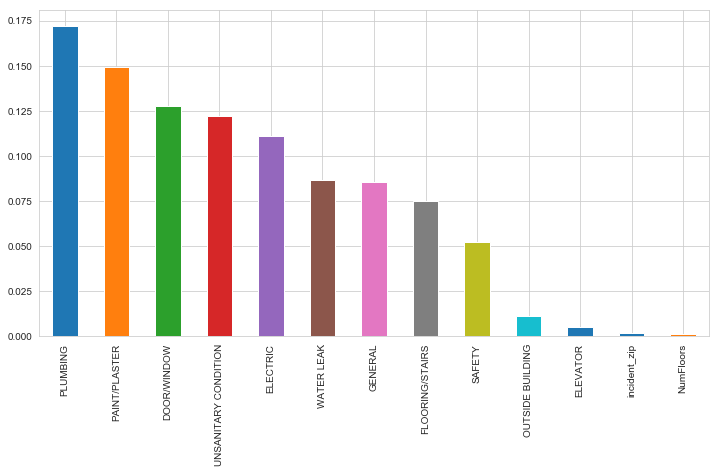

In [46]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

## Extra-Trees (Extremely Randomized Trees) Ensemble

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [ ]:
xt_clf.fit(X_train, y_train)

In [ ]:
prediction_xt = xt_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction_xt))
print(confusion_matrix(y_test,prediction_xt))

## AdaBoost / Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier()

In [ ]:
ada_clf.fit(X_train, y_train)

In [ ]:
prediction_ada = ada_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction_ada))
print(confusion_matrix(y_test,prediction_ada))

## AdaBoost with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [ ]:
ada_clf.fit(X_train, y_train)

In [ ]:
prediction_ada = ada_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction_ada))
print(confusion_matrix(y_test,prediction_ada))

## Gradient Boosting / Gradient Boosting Machine (GBM)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [22]:
prediction_gbc = gbc_clf.predict(X_test)

In [23]:
print(classification_report(y_test,prediction_gbc))
print(confusion_matrix(y_test,prediction_gbc))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13922
           1       0.89      1.00      0.94      6025

   micro avg       0.96      0.96      0.96     19947
   macro avg       0.95      0.97      0.96     19947
weighted avg       0.97      0.96      0.96     19947

[[13179   743]
 [    0  6025]]


# XGBoost

In [24]:
import xgboost as xgb

In [25]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)

In [26]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [27]:
prediction_xgb = xgb_clf.predict(X_test)

In [28]:
print(classification_report(y_test,prediction_xgb))
print(confusion_matrix(y_test,prediction_xgb))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     13922
           1       0.89      1.00      0.94      6025

   micro avg       0.96      0.96      0.96     19947
   macro avg       0.95      0.97      0.96     19947
weighted avg       0.97      0.96      0.96     19947

[[13179   743]
 [    0  6025]]


In [54]:
print(xgb_clf.feature_importances_)

[0.37678692 0.5068073  0.01123213 0.01089176 0.00748809 0.01123213
 0.01123213 0.00816882 0.0115725  0.0115725  0.00987066 0.0115725
 0.0115725 ]


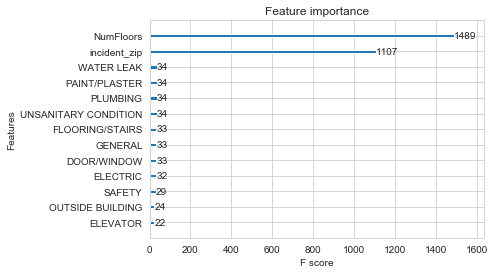

In [55]:
#plot feature importance
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()